
<img src="https://img.kaikeba.com/web/hcTech/img_logo.png" alt="图片替换文本" width="500" height="150" align="bottom" />

# Lesson-01 Assignment

   各位同学大家好，欢迎各位开始学习我们的人工智能课程。这门课程假设大家不具备机器学习和人工智能的知识，但是希望大家具备初级的Python编程能力。根据往期同学的实际反馈，我们课程的完结之后 能力能够超过80%的计算机人工智能/深度学习方向的硕士生的能力。

## 本次作业的内容

### 1. Recode all examples;

### 2. Please answer some questions about our course. We do appreciate your help.

   2.1  What do you want to get in this course? 

Answer:学习传统图像的基础知识和基本操作，重点学习深度学习在视觉相关场景应用中的模型优化和部署。

2.2 What problems do you want to solve? 

Answer: 模型训练及优化思路，框架的熟悉与应用

 2.3 What advantages do you have to accomplish your goal?

Answer:具备一定的视觉领域算法基础和应用实践

 2.4 What disadvantages you need to overcome to accomplish your goal?

Answer:尽可能多的使用这些技能，熟悉起来

2.5 How will you plan to study in this course? 

Answer:目标是熟练应用深度学习的常用框架，如tf,pytorch；掌握模型结构设计的方法与原则；掌握模型优化的策略和部署

邮箱地址：ymzhang@kaikeba.com  

### 3. 如何提交
提交github地址 或者 提交压缩包到学习平台

### 4.  理论题
- 4.1 图像有几个通道，通道分别是什么颜色？
- 4.2 图像由 cv2.imread 读取，通道按什么顺序？
- 4.3 阐述卷积可以干什么？以及图像卷积的过程？（可以图示）
- 4.4 numpy中的np.vstack和np.hstack的区别？（可以代码展示）

答：  
4.1 图像有3个通道，分别为R，G，B；  
  
4.2 cv2读取到的图片，通道顺序为GBR，如果要显示原图的色彩，需要通过cv2.cvtColor(img, cv2.COLOR_BGR2RGB)将通道转换为RGB的顺序；  
  
4.3 卷积可以对图像进行滤波，在深度学习中通过卷积来提取图像的特征，将得到的特征图用于具体的任务中（如图像分类，目标检测，语义分割）；图像的卷积过程就是卷积核与图像中的像素对应位置相乘，再将乘完的结果相加，如果有偏置项的话再加上偏置，作为卷积后该位置像素点的值，最终通过按照步长移动，同样的方式计算，得到完整的特征图；  
  
4.4 np.vstack是按垂直方向堆叠，要求两个数组的列数一致； np.hstack是水平方向堆叠，要求两个数组的行数一致；  

### 理论题补充优化

# 卷积

- <font color=green size=4 face=雅黑>  parameters sharing </font>  

## 一维卷积


<img src="https://img-blog.csdnimg.cn/20200326111118318.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="300" height="200" align="bottom" />

<img src="https://img-blog.csdnimg.cn/20200326111317780.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70#pic_center" alt="图片替换文本" width="300" height="400" align="bottom" />

## 二维卷积

<img src="https://img-blog.csdnimg.cn/20200303120025220.jpeg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3UwMTA3NTE5NzQ=,size_16,color_FFFFFF,t_70" alt="图片替换文本" width="400" height="600" align="bottom" />

## 图像卷积

 <center>
<img style="zoom:70%;"
src="image_conv.jpg">
<br>
<div style="color:black; ">  </div>
</center>


### np.vstack与np.hstack

In [12]:
import numpy as np

a = np.array([[1,2,3,4]])
b = np.array([[5,6,7,8]])
c = np.array([[100,200],[300,400]])

# 垂直堆叠
v_arr = np.vstack((a, b))     # 2个1X4 -> 1个2X4
print("垂直堆叠np.vstack:{},{} ->{}".format(a.shape, b.shape, v_arr.shape))
# 水平堆叠
h_arr = np.hstack((v_arr, c))   # 2X4 和 2X2  -> 1个2X4
print("水平堆叠np.hstack:{},{} ->{}".format(v_arr.shape, c.shape, h_arr.shape))

垂直堆叠np.vstack:(1, 4),(1, 4) ->(2, 4)
水平堆叠np.hstack:(2, 4),(2, 2) ->(2, 6)


<img src="https://img.kaikeba.com/web/hcTech/img_logo.png" alt="图片替换文本" width="500" height="150" align="bottom" />

### 5. 完成以下问答和编程练习

5.1.1  请先实现这些函数 **image crop, rotation, Affine Transformand perspective transform** , 记得设置函数的参数。

5.1.2  拓展题：同学可以进一步定义一个函数 **image_color_shift**，将图像的三个通道的像素值，加上一个随机值或者减去一个随机值(假设是正值)。需要注意的是图像的像素值是0-255。



In [1]:
import cv2
import random
import numpy as np

class ImageTransformer:

    def image_crop(self,img, min_x, max_x, min_y, max_y): 
        """
        input:
            img:   待裁剪的图像
            min_x: 裁剪区域的起始行
            max_x: 裁剪区域的终止行
            min_y: 裁剪区域的起始列
            max_y: 裁剪区域的终止列
        output:
            img_crop: 裁剪后的图像
        """
        img_crop = img[min_x: max_x, min_y: max_y, :]
        
        return img_crop


    def rotation(self, img, aug_val, scale): # your code here
        """
        input:
            img:     待旋转的图像
            aug_val: 旋转的角度    0-360
            scale:   缩放比例    
        output:
            img_rot: 旋转后的图像
        """
        M = cv2.getRotationMatrix2D((0.5*img.shape[1], 0.5*img.shape[0]), aug_val, scale)
        img_rot = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
        
        return img_rot

    def perspective_transform(self, img, pts1, pts2): # your code here
        """
        input:
            img:  待变换的图像
            pts1: 原始的坐标点
            pts2: 旋转后的坐标点
        output:
            img_p: 投影后的图像
        """
        # 得到图像的宽高
        h, w = img.shape[0], img.shape[1]
        #计算转换M矩阵
        M = cv2.getPerspectiveTransform(pts1,pts2)
        #应用M矩阵到原图像
        img_p = cv2.warpPerspective(img,M,(w, h))
        
        return img_p

    def image_color_shift(self, img, mode='line', a = 1, b = 2, gamma = 3):
        """
        input:
            img :  待处理的图像
            mode:  处理模式, 'line':线性变换,需要设置参数a,b；  'gamma': gamma变换,需要设置参数gamma
            a   :  mode='line'时设置  1-10
            b   :  mode='line'时设置  0-255
            gamma: mode='gamma'时设置  
        output:
            s   :  变换完后的图像
        """
        r = np.copy(img)
        if mode == 'line':
            s = a*r+b
        elif mode == 'gamma':
            s = np.power(r/255, gamma)
        else:
            print("mode设置错误!")
        
        return s

    

(473, 627, 3)


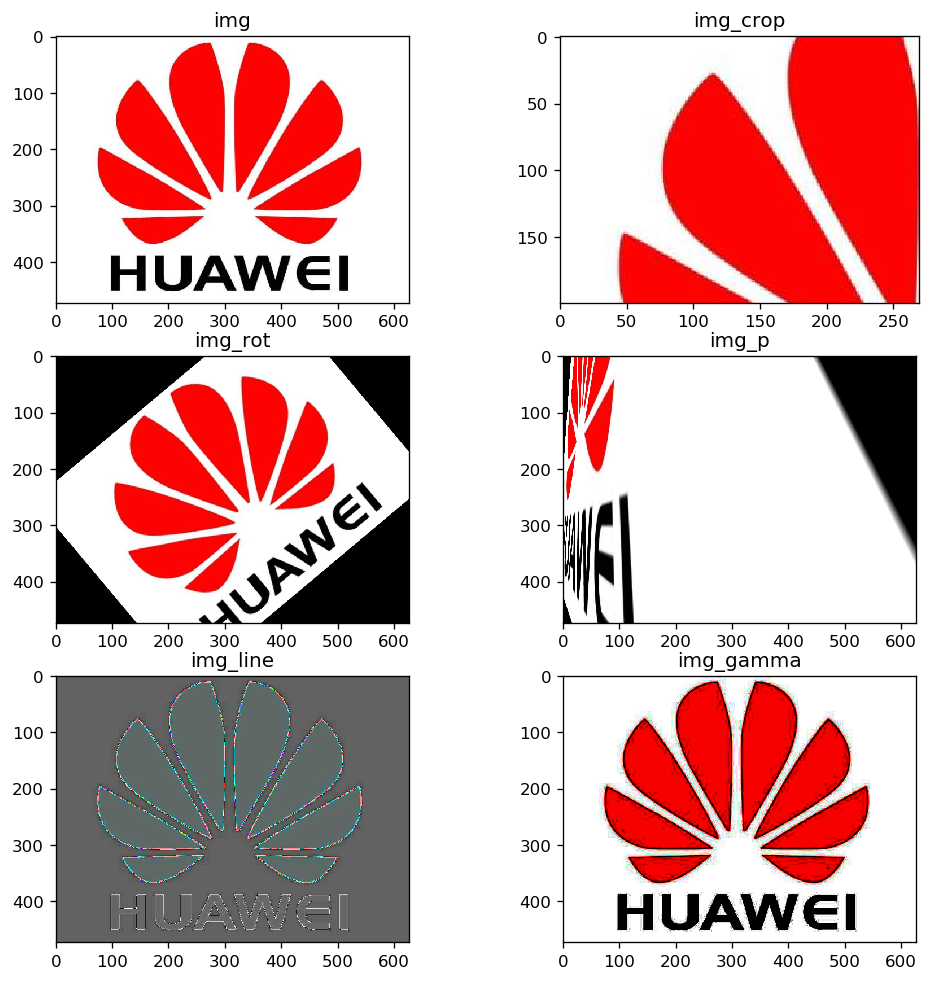

In [2]:
import matplotlib.pyplot as plt
# matplotlit inline
transformer = ImageTransformer()
img = cv2.imread('test_huawei.jpeg') # your image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
# 裁剪
img_crop = transformer.image_crop(img, 50, 250, 30, 300)
# 旋转
img_rot = transformer.rotation(img, 40, 0.9)
# 投影变换
pts1 = np.float32([[0,300],[500,600],[500,400],[620,400]])
pts2 = np.float32([[0,200],[300,6500],[100,300],[500,300]])
img_p = transformer.perspective_transform(img, pts1, pts2)
# 图像平移 线性
img_line = transformer.image_color_shift(img, mode='line', a = 2, b = 100)
# gamma变换
img_gamma = transformer.image_color_shift(img, mode='gamma', gamma = 8)

plt.figure(figsize=(10,10),dpi=120)#,dpi = 120
plt.subplot(321),plt.imshow(img),plt.title('img')
plt.subplot(322),plt.imshow(img_crop),plt.title('img_crop')
plt.subplot(323),plt.imshow(img_rot),plt.title('img_rot')
plt.subplot(324),plt.imshow(img_p),plt.title('img_p')
plt.subplot(325),plt.imshow(img_line),plt.title('img_line')
plt.subplot(326),plt.imshow(img_gamma),plt.title('img_gamma')

plt.show()

各位同学，你已经把课上关于图像增广实现了！

5.2  请实现一个图像的前景放在另一个图像上面。

(848, 1277, 3)
(848, 1277, 3)


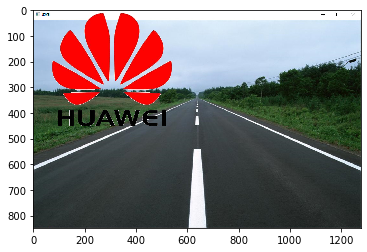

In [4]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
# matplotlit inline


# your code here
img_1 = cv2.imread('test_huawei.jpeg') # your image
#img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
 
img_2 = cv2.imread('Lane_line.jpg') # your image

#print(img_1.shape)
plt.imshow(img_1)

# 设置颜色阈值
WHITE_HMIN, WHITE_HMAX, WHITE_SMIN, WHITE_SMAX, WHITE_VMIN, WHITE_VMAX = 0, 180, 0, 30, 221, 255
img_1_hsv = cv2.cvtColor(img_1, cv2.COLOR_BGR2HSV)       # 转换成hsv色彩风格
mask_1 = cv2.inRange(
                    img_1_hsv, 
                    (WHITE_HMIN, WHITE_SMIN, WHITE_VMIN), 
                    (WHITE_HMAX, WHITE_SMAX, WHITE_VMAX)
                  )   # 利用inRange产生mask
#print(mask_1.shape)
mask_1_not = cv2.bitwise_not(mask_1) # 取反
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_1_mask = cv2.bitwise_and(img_1, img_1, mask=mask_1_not)
plt.imshow(img_1_mask)

# 扩充img1尺寸到img2
arr = np.uint8(np.full((img_2.shape[0],img_2.shape[1], 3), 0))
arr[0: img_1.shape[0], 0: img_1.shape[1], :] = img_1_mask
img_1_mask = arr
print(img_1_mask.shape)


#img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
#print(img_2.shape)
MAX_VALUE = 255
mask = np.uint8(np.full((img_2.shape[0],img_2.shape[1]),MAX_VALUE))
mask[0:img_1.shape[0], 0:img_1.shape[1]] = mask_1
plt.imshow(mask, cmap='gray')

img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_2_mask = cv2.bitwise_and(img_2, img_2, mask=mask)
print(img_2_mask.shape)
plt.imshow(img_2_mask)

img_res = img_1_mask + img_2_mask
plt.imshow(img_res)

各位同学，你已经把图像的感兴趣区域提取了，并且实现了图像融合！

这次的作业就到这里了！祝大家学习进步！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)